# Gerren Hunter

## Research question/interests

Originally, I wanted to create a machine-learning model to predict fights, but due to time constraints and an overestimation of my abilities, I will be answering the following questions instead. 

Q1.) How does the total amount of significant strikes to the head affect a fighter’s career? (In terms of securing future wins) 	

Q2.) What are the top 3 ways of finishing a fight, be it submission, tko, etc...

Q3.) Is there a correlation with the fighter's reach and the number of wins that they have? 


In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_raw = pd.read_csv("../data/raw/raw_data.csv")

data_raw.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


# Milestone 3 

## Task 1: EDA 

First, let's start off by examing some general trends of the data

In [6]:
data_raw.shape

(6012, 144)

In [7]:
data_raw.describe()

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,...,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.00000,4585.000000,...,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6008.000000,5606.000000,6010.000000,5840.000000,5949.000000
mean,0.247476,0.176818,0.453310,0.434290,0.292650,0.268742,0.478884,0.409276,0.15673,0.141306,...,0.306886,1.251331,1.297572,0.796241,0.069195,178.991788,183.562347,170.686356,29.293151,29.598252
std,0.378509,0.324633,0.130458,0.132618,0.273628,0.267178,0.724229,0.653826,0.34199,0.322623,...,0.619485,1.681376,1.859955,1.355801,0.273980,8.812985,10.585313,35.724626,4.063297,4.167755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,152.400000,152.400000,115.000000,18.000000,19.000000
25%,0.000000,0.000000,0.376489,0.351045,0.031250,0.033203,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,172.720000,177.800000,145.000000,26.000000,27.000000
50%,0.015625,0.000000,0.450000,0.427500,0.250000,0.200000,0.148468,0.098389,0.00000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,180.340000,182.880000,170.000000,29.000000,29.000000
75%,0.500000,0.250000,0.527500,0.510000,0.500000,0.422812,0.750000,0.531250,0.12500,0.125000,...,0.000000,2.000000,2.000000,1.000000,0.000000,185.420000,190.500000,185.000000,32.000000,32.000000
max,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,8.000000,7.000000,4.00000,3.000000,...,5.000000,10.000000,11.000000,13.000000,2.000000,210.820000,213.360000,345.000000,51.000000,47.000000


In [8]:
for col in data_raw.columns:
    print(col)

R_fighter
B_fighter
Referee
date
location
Winner
title_bout
weight_class
B_avg_KD
B_avg_opp_KD
B_avg_SIG_STR_pct
B_avg_opp_SIG_STR_pct
B_avg_TD_pct
B_avg_opp_TD_pct
B_avg_SUB_ATT
B_avg_opp_SUB_ATT
B_avg_REV
B_avg_opp_REV
B_avg_SIG_STR_att
B_avg_SIG_STR_landed
B_avg_opp_SIG_STR_att
B_avg_opp_SIG_STR_landed
B_avg_TOTAL_STR_att
B_avg_TOTAL_STR_landed
B_avg_opp_TOTAL_STR_att
B_avg_opp_TOTAL_STR_landed
B_avg_TD_att
B_avg_TD_landed
B_avg_opp_TD_att
B_avg_opp_TD_landed
B_avg_HEAD_att
B_avg_HEAD_landed
B_avg_opp_HEAD_att
B_avg_opp_HEAD_landed
B_avg_BODY_att
B_avg_BODY_landed
B_avg_opp_BODY_att
B_avg_opp_BODY_landed
B_avg_LEG_att
B_avg_LEG_landed
B_avg_opp_LEG_att
B_avg_opp_LEG_landed
B_avg_DISTANCE_att
B_avg_DISTANCE_landed
B_avg_opp_DISTANCE_att
B_avg_opp_DISTANCE_landed
B_avg_CLINCH_att
B_avg_CLINCH_landed
B_avg_opp_CLINCH_att
B_avg_opp_CLINCH_landed
B_avg_GROUND_att
B_avg_GROUND_landed
B_avg_opp_GROUND_att
B_avg_opp_GROUND_landed
B_avg_CTRL_time(seconds)
B_avg_opp_CTRL_time(seconds)
B_total

Let's start taking a look at our data. There are a lot of extranious columns that I don't need that I will address in step 2, but first I want to start associating some variables together. Notice how this data is divided into blue corner and red corner. 

Let's take a look at the number of wins versus strikes to the head for both opponents in the red corner and blue corner.


[Text(0.5, 1.0, 'Blue Corner'),
 Text(0, 0.5, 'Number of Wins'),
 Text(0.5, 0, 'Average Opponent Head Strikes Landed')]

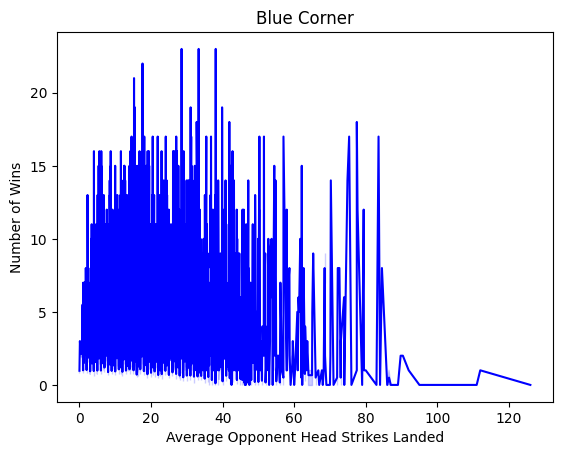

In [194]:
ax = sns.lineplot(data = data_raw, x = data_raw["B_avg_opp_HEAD_landed"], y=data_raw["B_wins"], color="blue")

ax.set (
    title = 'Blue Corner',
    ylabel = "Number of Wins",
    xlabel = "Average Opponent Head Strikes Landed"
)

[Text(0.5, 1.0, 'Red Corner'),
 Text(0, 0.5, 'Number of Wins'),
 Text(0.5, 0, 'Average Opponent Head Strikes Landed')]

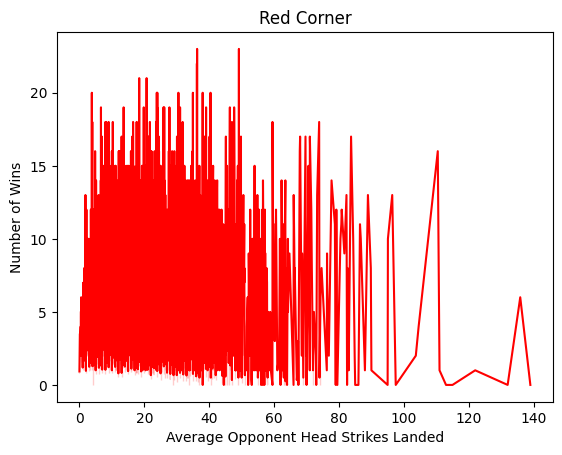

In [195]:
ax = sns.lineplot(data = data_raw, x = data_raw["R_avg_opp_HEAD_landed"], y=data_raw["R_wins"], color="red")

ax.set (
    title = 'Red Corner',
    ylabel = "Number of Wins",
    xlabel = "Average Opponent Head Strikes Landed"
)

I will continue my analsyis in step 4, but it's very interesting to see that so far, as each fighter takes more strikes to the head, the less wins they will secure. 

Let's take a quick look at the stats for the second quesiton.

In [296]:


win_decision_majority = (data_raw["R_win_by_Decision_Majority"]).sum() + (data_raw["B_win_by_Decision_Majority"]).sum()
print(win_decision_majority)

win_by_Decision_Split = (data_raw["R_win_by_Decision_Split"]).sum() + (data_raw["B_win_by_Decision_Split"]).sum()
print(win_by_Decision_Split)

win_by_Decision_Unanimous = (data_raw["R_win_by_Decision_Unanimous"]).sum() + (data_raw["B_win_by_Decision_Unanimous"]).sum()
print(win_by_Decision_Unanimous)

win_by_KO_TKO = (data_raw["R_win_by_KO/TKO"]).sum() + (data_raw["B_win_by_KO/TKO"]).sum()
print(win_by_KO_TKO)

win_by_Submission = (data_raw["R_win_by_Submission"]).sum() + (data_raw["B_win_by_Submission"]).sum()
print(win_by_Submission)

win_by_TKO_Doctor_Stoppage = (data_raw["R_win_by_TKO_Doctor_Stoppage"]).sum() + (data_raw["B_win_by_TKO_Doctor_Stoppage"]).sum() 
print(win_by_TKO_Doctor_Stoppage)

print("Did not account for repeating fights!")


265
3158
12562
13186
8211
669
Did not account for repeating fights!


It looks like I have some repitition. This is soemthing I will address later in my analysis. 

Now let's create some visualizations with reach and wins, for both the blue corner and the red corner for question 3

[Text(0.5, 1.0, 'Blue Corner'), Text(0, 0.5, 'Wins'), Text(0.5, 0, 'Reach')]

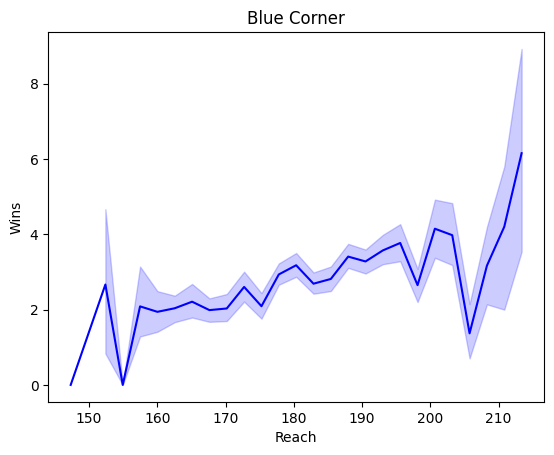

In [88]:
ax = sns.lineplot(data = data_raw, x = data_raw["B_Reach_cms"], y=data_raw["B_wins"], color="blue")
ax.set (
    title = 'Blue Corner',
    ylabel = "Wins",
    xlabel = "Reach"
)

[Text(0.5, 1.0, 'Red Corner'), Text(0, 0.5, 'Wins'), Text(0.5, 0, 'Reach')]

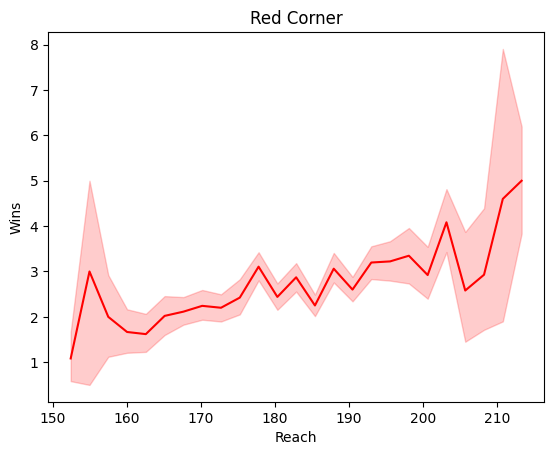

In [89]:
ax = sns.lineplot(data = data_raw, x = data_raw["R_Reach_cms"], y=data_raw["B_wins"], color="red")
ax.set (
    title = 'Red Corner',
    ylabel = "Wins",
    xlabel = "Reach"
)

## Task 2: Data Analysis Pipeline

1. Load Data (already done) 

2. Clean data: 

There is a lot of extranious data that I do not need. I will get rid of extraneous columns below and seperate the data into two sets, red corner and blue corner. 



In [138]:
df_blue = data_raw[["B_avg_opp_HEAD_landed", "B_wins", "B_win_by_Decision_Majority", "B_win_by_Decision_Split", "B_win_by_Decision_Unanimous", "B_win_by_KO/TKO", "B_win_by_Submission", "B_win_by_TKO_Doctor_Stoppage", "B_Reach_cms"]]
df_blue = df_blue.dropna()

df_red = data_raw[["R_avg_opp_HEAD_landed", "R_wins", "R_win_by_Decision_Majority", "R_win_by_Decision_Split", "R_win_by_Decision_Unanimous", "R_win_by_KO/TKO", "R_win_by_Submission", "R_win_by_TKO_Doctor_Stoppage", "R_Reach_cms"]]
df_red = df_red.dropna()


## Task 3: Method Chaining

In [297]:
import chainingFile as f2


cleaned_data = f2.load_and_process("../data/raw/raw_data.csv")

cleaned_data


,B_avg_opp_HEAD_landed,B_wins,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Reach_cms,R_avg_opp_HEAD_landed,R_wins,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Reach_cms
0,27.500000,1,0,0,0,0,1,0,170.18,5.000000,1,0,0,0,1,0,0,177.80
1,7.500000,2,0,1,0,1,0,0,193.04,13.343750,4,0,1,0,3,0,0,187.96
4,22.625000,4,0,0,1,2,1,0,182.88,38.693359,5,0,0,1,2,2,0,172.72
5,14.625000,4,0,0,2,0,2,0,182.88,14.320312,7,0,1,2,2,2,0,190.50
6,37.830078,4,1,0,1,2,0,0,193.04,19.062500,4,0,0,1,3,0,0,180.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5759,4.250000,3,0,0,0,2,1,0,187.96,3.468750,5,0,0,1,2,1,1,187.96
5767,5.000000,1,0,0,1,0,0,0,187.96,2.250000,2,0,0,1,0,0,1,193.04
5799,5.000000,1,0,0,0,1,0,0,187.96,5.875000,3,0,0,0,2,0,1,187.96
5840,8.000000,1,0,0,1,0,0,0,193.04,4.500000,0,0,0,0,0,0,0,187.96


Nice and clean like I was expecting!

## Task 4: Analysis

Now that I have finished my EDA, cleaned my data, and then created a method chain, I will attempt to answer the questions that I have listed above. 

### Question 1: Does the amount of strikes to the head significantly impact a fighters career? (in terms of winning fights)

The graphs that I created in the EDA actually do an exceptionally good job at answering this question. Let's take a look at the performance for both the blue and the red fighter and attempt to answer that question. 

[Text(0.5, 1.0, 'Blue Corner'),
 Text(0, 0.5, 'Number of Wins'),
 Text(0.5, 0, 'Average Opponent Head Strikes Landed')]

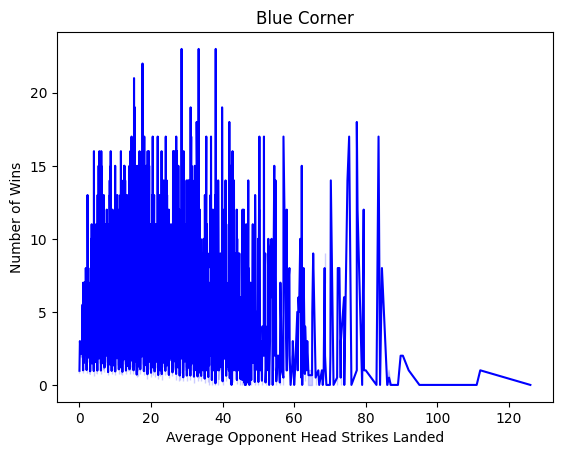

In [192]:
ax = sns.lineplot(data = data_raw, x = data_raw["B_avg_opp_HEAD_landed"], y=data_raw["B_wins"], color="blue")

ax.set (
    title = 'Blue Corner',
    ylabel = "Number of Wins",
    xlabel = "Average Opponent Head Strikes Landed"
)

[Text(0.5, 1.0, 'Red Corner'),
 Text(0, 0.5, 'Number of Wins'),
 Text(0.5, 0, 'Average Opponent Head Strikes Landed')]

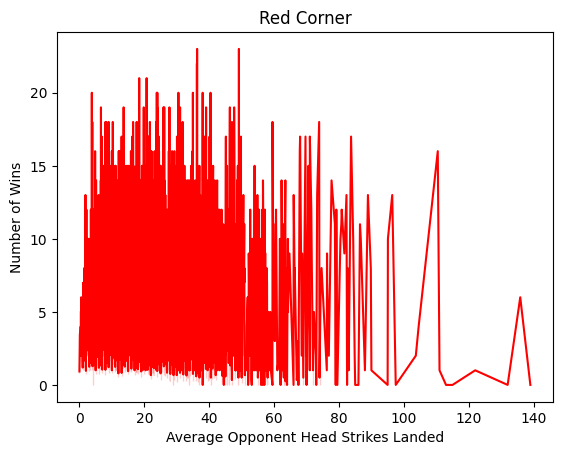

In [190]:
ax2 = sns.lineplot(data = data_raw, x = data_raw["R_avg_opp_HEAD_landed"], y=data_raw["R_wins"], color="red")

ax2.set (
    title = 'Red Corner',
    ylabel = "Number of Wins",
    xlabel = "Average Opponent Head Strikes Landed"
)

It is very clear to see that as the number of hits to the head that a fighter suffers, the less likely they are to win a future bout. The x-axis represents the number of times the opponent landed a head kick on that fighter. This is an accumaliting statistic. There is a disporportionate relationship to the number of head strikes landed to winning a fight, for both corners, so keep your hands up when you fight!

Out of pure curosity, I want to see what the distribution is like for head strikes to a fighter. 

/var/folders/yl/m747lj_x7hd0zw2tc91djgl40000gn/T/ipykernel_34762/1100264691.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_raw["R_avg_opp_HEAD_landed"])


<AxesSubplot: xlabel='R_avg_opp_HEAD_landed', ylabel='Density'>

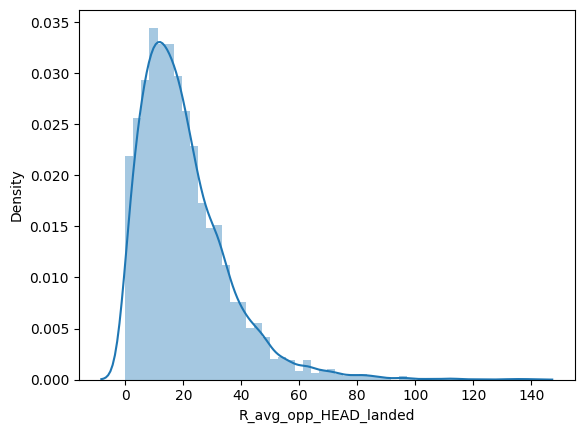

In [193]:
sns.distplot(data_raw["R_avg_opp_HEAD_landed"])

Let's extract the mean as well. We know already that you haft to keep your hands up in a fight, I would like 

In [271]:
a = data_raw["R_avg_opp_HEAD_landed"].mean()
b = data_raw["B_avg_opp_HEAD_landed"].mean()

print("The average number of strikes to the head is " + str(round((a + b), 0)) + " per fighter")
print("Keep your hands up!")

The average number of strikes to the head is 40.0 per fighter
Keep your hands up!


### Question 2: Most common ways of winning a fight

6
110
30
132
174
6


<BarContainer object of 6 artists>

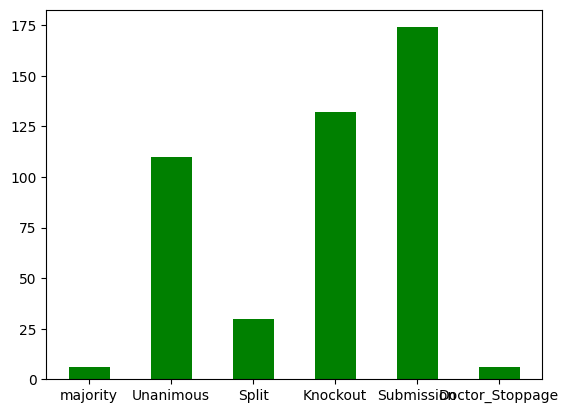

In [329]:
# drop duplicates

win_decision_majority = (data_raw["R_win_by_Decision_Majority"]).drop_duplicates(keep="first").sum() +  (data_raw["B_win_by_Decision_Majority"]).drop_duplicates(keep="first").sum()
print(win_decision_majority)

win_by_Decision_Unanimous = (data_raw["R_win_by_Decision_Unanimous"]).drop_duplicates(keep="first").sum() + (data_raw["B_win_by_Decision_Unanimous"]).drop_duplicates(keep="first").sum()
print(win_by_Decision_Unanimous)

win_by_Decision_Split = (data_raw["R_win_by_Decision_Split"]).drop_duplicates(keep="first").sum() + (data_raw["B_win_by_Decision_Split"]).drop_duplicates(keep="first").sum()
print(win_by_Decision_Split)

win_by_KO_TKO = (data_raw["R_win_by_KO/TKO"]).drop_duplicates(keep="first").sum() + (data_raw["B_win_by_KO/TKO"]).drop_duplicates(keep="first").sum()
print(win_by_KO_TKO)

win_by_Submission = (data_raw["R_win_by_Submission"]).drop_duplicates(keep="first").sum() + (data_raw["B_win_by_Submission"]).drop_duplicates(keep="first").sum()
print(win_by_Submission)

win_by_TKO_Doctor_Stoppage = (data_raw["R_win_by_TKO_Doctor_Stoppage"]).drop_duplicates(keep="first").sum() + (data_raw["B_win_by_TKO_Doctor_Stoppage"]).drop_duplicates(keep="first").sum()
print(win_by_TKO_Doctor_Stoppage)


data = {"majority" : win_decision_majority, "Unanimous" : win_by_Decision_Unanimous, "Split" : win_by_Decision_Split, "Knockout" : win_by_KO_TKO, "Submission" : win_by_Submission, "Doctor_Stoppage" :win_by_TKO_Doctor_Stoppage}

plt.bar(data.keys(), data.values(), width=0.5, color='g')




Interestingly enough, the most common way to win a fight in the UFC is by Submission, second being knockout, and third being a unanimous decision by the judges votes!

### Question 3: Does reach significantly impact if a fighter wins his/her fight or not? 

Reach is how long a fighter's hand extends away from their body. In other common martial art competitions, they will also calculate the reach of fighter's legs (which I think is a new stat for UFC for the upcoming year, but not in this data set) 

Reach is a very important metric because fights have a distinct advantage. Ever have little brothers or sisters growing up, and why they get mad you keep the distance by putting your hand on their forehead while they swing and pout, doing virtually no damage to you? That's exactly what it's like to fight somebody who has reach on you and it makes it so much harder to close the distance and counter. I want to see percisely what that relationship is. 

Looking back at my EDA, that actually did a great job demonstrating what that relationship looks like. Let's go back and graph on the x-axis the reach (in cm's) and the y-axis will be the number of wins and see if we can draw any conclusions. Just like I did in the past, I will graph it for both blue and red corners. 

[Text(0.5, 1.0, 'Blue Corner'), Text(0, 0.5, 'Wins'), Text(0.5, 0, 'Reach')]

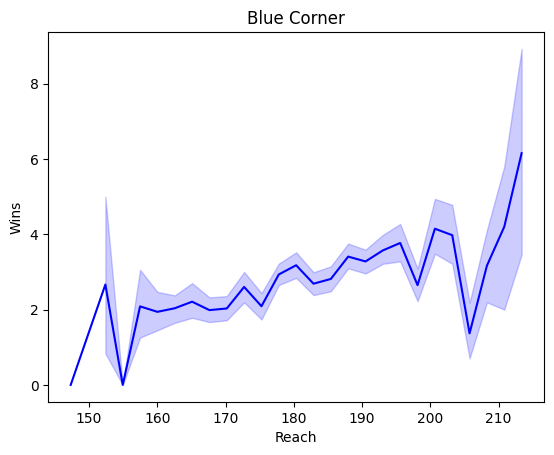

In [293]:
ax = sns.lineplot(data = data_raw, x = data_raw["B_Reach_cms"], y=data_raw["B_wins"], color="blue")
ax.set (
    title = 'Blue Corner',
    ylabel = "Wins",
    xlabel = "Reach"
)


[Text(0.5, 1.0, 'Red Corner'), Text(0, 0.5, 'Wins'), Text(0.5, 0, 'Reach')]

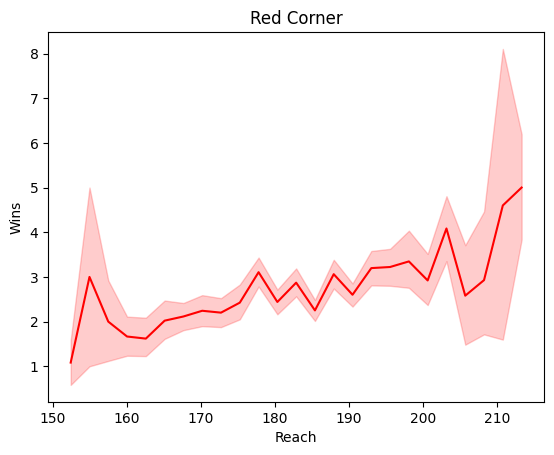

In [294]:
ax = sns.lineplot(data = data_raw, x = data_raw["R_Reach_cms"], y=data_raw["B_wins"], color="red")
ax.set (
    title = 'Red Corner',
    ylabel = "Wins",
    xlabel = "Reach"
)

Look at how clear this relationship is. As the fighter's reach increases, there is a steadily increase in the number of fights that he/she wins as well. In my future milestones, I want to look into why there is a bump of victories at 155cm Reach. I wonder if this is due to a weight class, like if smaller weight classes have a lower average reach which is why we are seeing that bump at 155cm, but due to time constraints, that will need to be something I will answer for Milestone 4.

Either way, these graphs clearly demonstrate that a longer reach gives an advantage over your opponent. 